In [2]:
%load_ext sage
pretty_print_default(True)
latex.matrix_delimiters("[", "]")

In [247]:
Box = column_matrix(QQ, [ [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1], [1/8, 1/8, 1], [1/8-1/16, 1/8+1/16, 1] ])

def PlotFigures(Figures, IncludeAxes, FigSize, Color):
    Plot = []
    for M in Figures:
        P = M.columns()
        Plot = Plot + [line([ [P[i][0], P[i][1]], [P[i+1][0], P[i+1][1]] ], color=Color) for i in [0..len(P)-2]]
    show(sum(Plot), axes=IncludeAxes, aspect_ratio=1, figsize=FigSize)

    
def PlotFiguresT(Figures, IncludeAxes, FigSize, Color, ThicknessStart, ratioLTOne):
    Plot = []
    Thickness=ThicknessStart
    for M in Figures:
        P = M.columns()
        Thickness = Thickness*ratioLTOne
        Plot = Plot + [line([ [P[i][0], P[i][1]], [P[i+1][0], P[i+1][1]] ], color=Color,thickness=Thickness) for i in [0..len(P)-2]]
    show(sum(Plot), axes=IncludeAxes, aspect_ratio=1, figsize=FigSize)

    
def Scale(s): return matrix(RR, [
            [s, 0, 0],
            [0, s, 0],
            [0, 0, 1]
        ])

def Translate(a, b): return matrix(RR, [
            [1, 0, a],
            [0, 1, b],
            [0, 0, 1]
        ])

def Transform(Figures, Transformations):
    New_Figures = []
    
    for M in Figures:
        for T in Transformations:
            New_Figures = New_Figures + [T*M]
            
    return New_Figures

def Generate(n, Figures, Transformations):
    Output_Figures = Figures
    for i in [1..n]:
         Output_Figures = Transform(Output_Figures, Transformations)
    return Output_Figures

def PlotPointFigures(Point_Figures, IncludeAxes, PointSize, FigSize, Color):
    Points = [[P.columns()[0][0], P.columns()[0][1]] for P in Point_Figures]
    show(points(Points, pointsize=PointSize, color=Color), axes=IncludeAxes, aspect_ratio=1, figsize=FigSize)

# Don't worry at all about how the function OpNorm (below) works. It's used in part F.
    
def OpNorm(A):
    G = matrix(RR, 2, [A[0,0], A[0,1], A[1,0], A[1,1]]);
    return N(sqrt(max([x for x in (G * G.transpose()).eigenvalues()])))

# Rotation by angle 'theta' (counter-clockwise about the origin).

def Rotate(theta): return matrix(RR, [
            [cos(theta), -sin(theta), 0],
            [sin(theta), cos(theta), 0],
            [0, 0, 1]
        ])

# Shearing in the x and y directions, each with shear factor 't'.

def ShearX(t):return matrix(RR,[[1, t, 0],
                                [0,1, 0],
                                [0, 0, 1]
        ])
def ShearY(t): return matrix(RR,[[1, 0, 0],
                                [t,1, 0],
                                [0, 0, 1]
        ])

# Scale by 's' in the x direction and by 't' in the y direction.

def ScaleXY(s, t): return matrix(RR,[[s, 0, 0],
                                [0,t, 0],
                                [0, 0, 1]
        ])


def GenerateRandom(n, Figure, Transformations):
    Output_Figures = Figure
    for i in [1..n]:
        set_random_seed()
        RandomTransIndex = floor(random()*len(Transformations))
        CurrentNumTrans = len(Output_Figures)
        Output_Figures = Output_Figures + [Transformations[RandomTransIndex]*Output_Figures[CurrentNumTrans - 1]]
    return Output_Figures

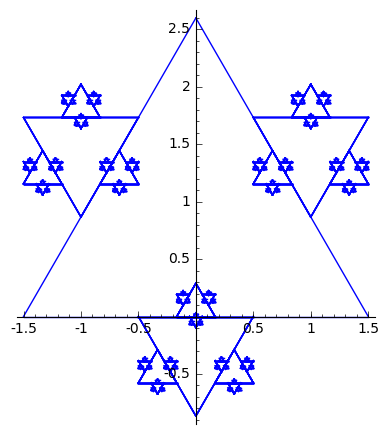

In [28]:
s=sin(pi/3)
c=cos(pi/3)

Triangle = column_matrix(RR, [ [0,3*s, 1], [1.5, 0, 1], [-1.5, 0, 1], [0,3*s, 1]])


T_1 = Translate(-1.5*c,1.5*s)*Rotate(pi/3)*Scale(1/3)
T_2 = Translate(1.5*c,1.5*s)*Rotate(-pi/3)*Scale(1/3)
T_3 = Rotate(pi)*Scale(1/3)
T_4 = Scale(1)

T = [T_1, T_2, T_3, T_4]

PlotFigures(Generate(5, [Triangle], T), True, 6, 'blue')

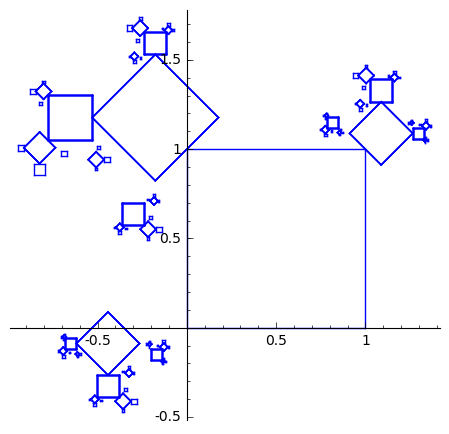

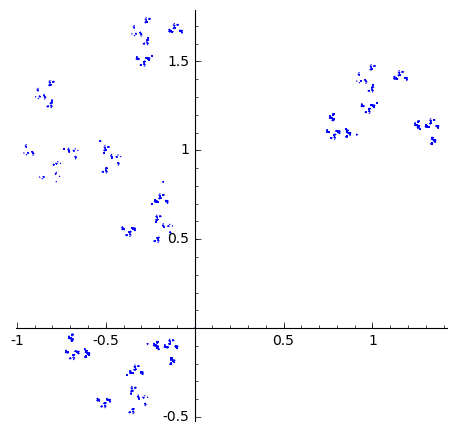

In [8]:
Square = column_matrix(RR, [ [0,0, 1], [1, 0, 1], [1, 1, 1], [0,1, 1], [0,0,1]])

s=sin(pi/4)

S_1 = Translate(-0.25*s,1-0.25*s)*Rotate(pi/4)*Scale(1/2)
S_2 = Translate(1-0.125*s,1+0.125*s)*Rotate(-pi/4)*Scale(1/4)
S_3 = Translate(-3*0.125*s,-0.125*s)*Rotate(3*pi/4)*Scale(1/4)
S_4 = Scale(1)

S = [S_1, S_2, S_3, S_4]

PlotFigures(Generate(4, [Square], S), True, 6, 'blue')

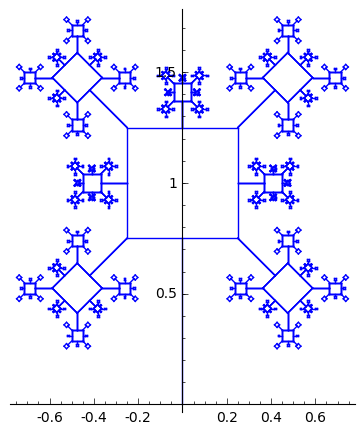

In [6]:
Lollipop = column_matrix(RR, [ [0,0, 1], [0, .75, 1], [0.25, 0.75, 1], [0.25,1.25, 1], [-0.25,1.25,1], [-0.25,0.75,1], [0,0.75,1]])

s=sin(pi/4)

L_1 = Translate(-0.25,1)*Rotate(pi/2)*Scale(1/(2*pi))
L_2 = Translate(0.25,1)*Rotate(-pi/2)*Scale(1/(2*pi))
L_3 = Translate(0,1.25)*Scale(1/(2*pi))
L_4 = Translate(-0.25,1.25)*Rotate(pi/4)*Scale(1/pi)
L_5 = Translate(0.25,1.25)*Rotate(-pi/4)*Scale(1/pi)
L_6 = Translate(-0.25,0.75)*Rotate(3*pi/4)*Scale(1/pi)
L_7 = Translate(0.25,0.75)*Rotate(-3*pi/4)*Scale(1/pi)
L_8 = Scale(1)

L = [L_1, L_2, L_3, L_4, L_5, L_6, L_7, L_8]

PlotFigures(Generate(3, [Lollipop], L), True, 6, 'blue')

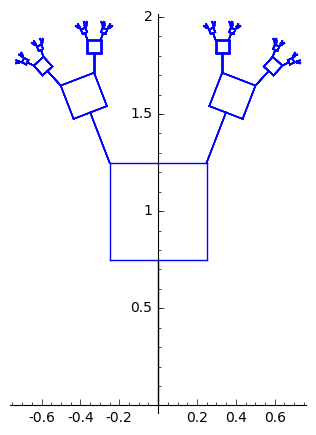

In [9]:
Shell = column_matrix(RR, [ [0,0, 1], [0, .75, 1], [0.25, 0.75, 1], [0.25,1.25, 1], [-0.25,1.25,1], [-0.25,0.75,1], [0,0.75,1]])

e=2.718281828459045;

Q_1 = Translate(-0.25,1.25)*Rotate(1/e)*Scale(1/e)
Q_2 = Translate(0.25,1.25)*Rotate(-1/e)*Scale(1/e)
Q_8 = Scale(1)

Q = [Q_1, Q_2, Q_8]

PlotFigures(Generate(5, [Shell], Q), True, 6, 'blue')

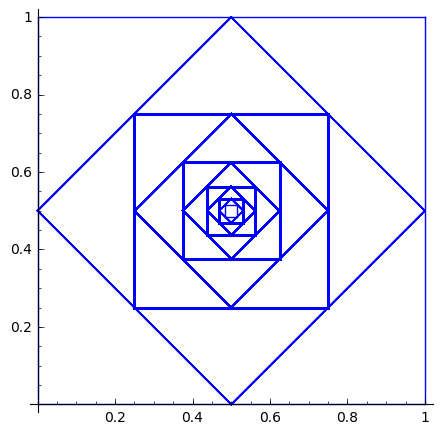

In [20]:
Inside = column_matrix(RR, [ [0,0, 1], [1, 0, 1], [1, 1, 1], [0,1, 1], [0,0,1]])

I_1 = Translate(0.5,0)*Rotate(pi/4)*Scale(1/sqrt(2))
I_8 = Scale(1)

I = [I_1, I_8]

PlotFigures(Generate(10, [Inside], I), True, 6, 'blue')

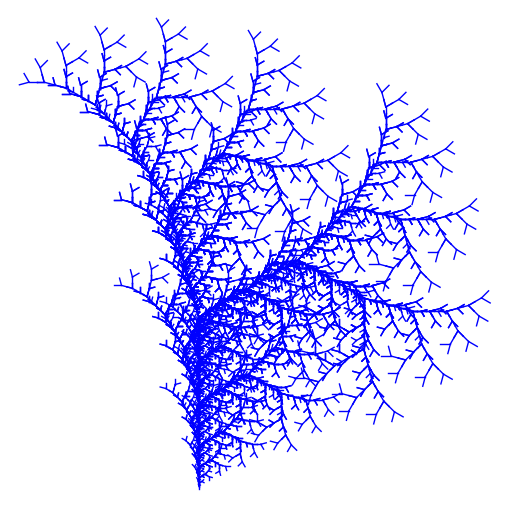

In [242]:
Tree = column_matrix(RR, [ [0,0, 1], [0, 1, 1]])

T_1 = Translate(0,1)*Rotate(pi/12)*Scale(2/3)
T_2 = Translate(0,1)*Rotate(-pi/3)*Scale(2/3)
T_3 = Scale(1/2)
T_4 = Translate(0,0.5)*Scale(1/2)

T = [T_1, T_2, T_3, T_4]

PlotFigures(Generate(7, [Tree], T), False, 7, 'blue')

## 

In [245]:
PlotPointFigures(Generate(10, [Tree], T), True, 1, 10, 'blue')

KeyboardInterrupt: 

In [225]:
Cleft = column_matrix(RR, [ [0,0,1],[1,1,1]])

C_1 = Translate(0,1)*Rotate(-pi/4)*Scale(1/sqrt(2))
C_2 = Rotate(pi/4)*Scale(1/sqrt(2))


C = [C_1, C_2]



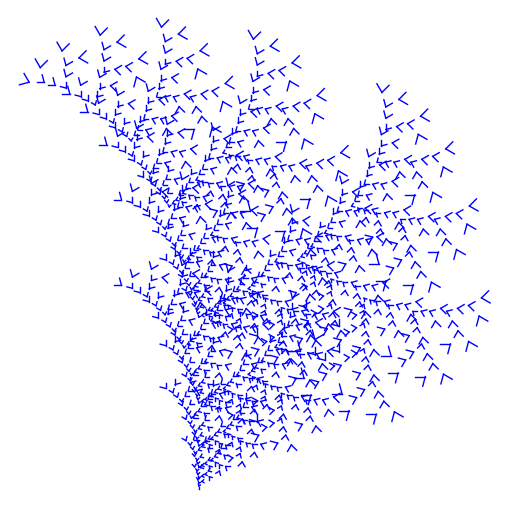

In [249]:
Tree2 = column_matrix(RR, [ [0,0, 1], [0, 1, 1]])

T_1 = Translate(0,1)*Rotate(pi/12)*Scale(2/3)
T_2 = Translate(0,1)*Rotate(-pi/3)*Scale(2/3)
T_3 = Scale(1/2)

T2 = [T_1, T_2, T_3]

PlotFigures(Generate(7, [Tree2], T2), False, 7, 'blue')

In [7]:
PlotPointFigures(Generate(7, [Tree2], T2), True, 1, 10, 'blue')

NameError: name 'Tree2' is not defined

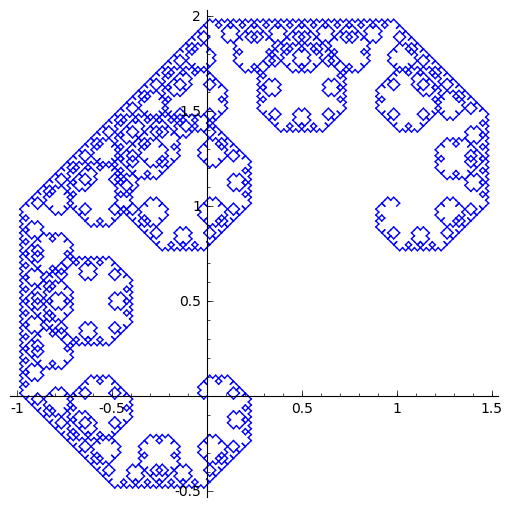

In [229]:
PlotFigures(Generate(12, [Cleft], C), True, 7, 'blue')

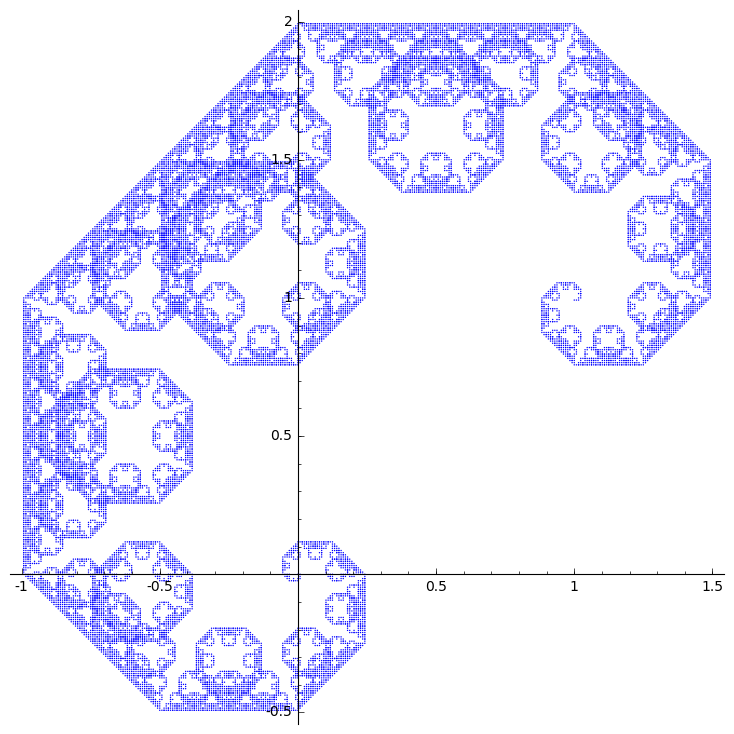

In [228]:
PlotPointFigures(Generate(15, [Cleft], C), True, 1, 10, 'blue')

Bolt = column_matrix(RR, [ [0.5,1, 1], [-0.5, 0, 1], [0.5,0, 1], [-0.5, -1, 1]])

B_1 = Translate(0,0.5)*Rotate(-pi/10)*Scale(sqrt(2/5))
B_2 = Rotate(13*pi/20)*Scale(sqrt(1/5))
B_3 = Translate(0,-0.5)*Rotate(pi-pi/10)*Scale(sqrt(2/5))

B = [B_1, B_2, B_3]

PlotFigures(Generate(7, [Bolt], B), True, 7, 'blue')

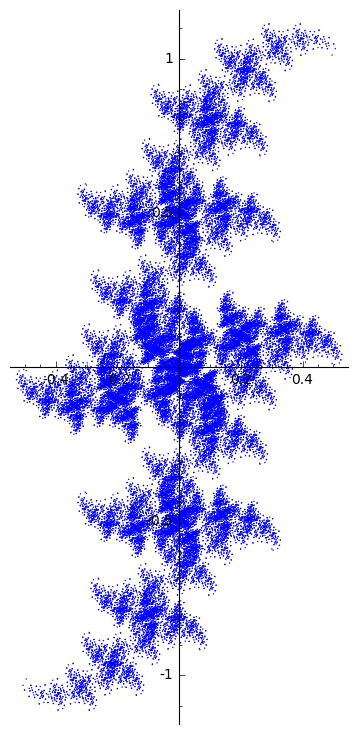

In [136]:
PlotPointFigures(Generate(10, [Bolt], B), True, 1, 10, 'blue')

# 

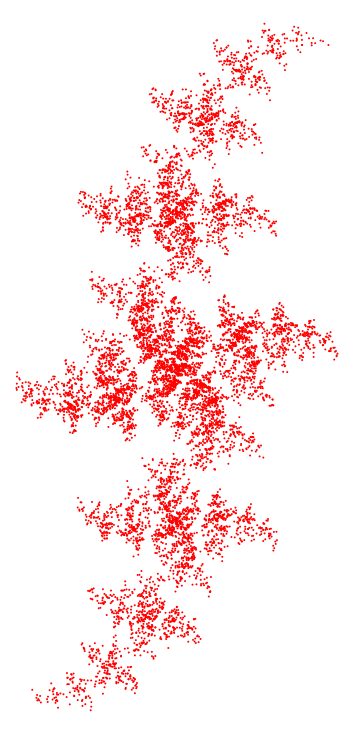

In [142]:
PlotPointFigures(GenerateRandom(10000, [matrix(RR, 3, [0, 0, 1])], B), False, 2, 10, 'red')

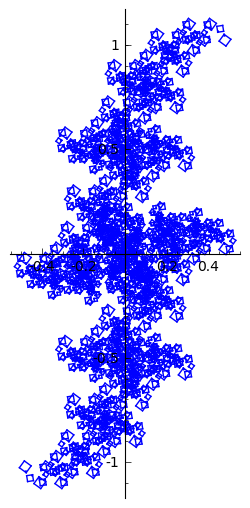

In [143]:
PlotFigures(Generate(7, [Box], B), True, 7, 'blue')

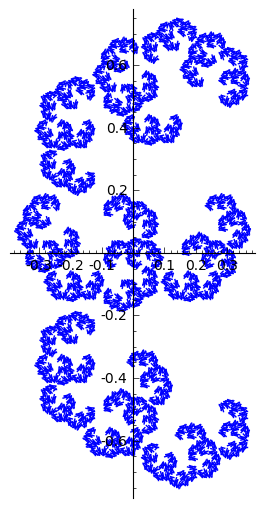

In [145]:
Bolt = column_matrix(RR, [ [0.5,1, 1], [-0.5, 0, 1], [0.5,0, 1], [-0.5, -1, 1]])

B_1 = Translate(0,0.5)*Rotate(-pi/3)*Scale(1/2)
B_2 = Rotate(pi/2)*Scale(1/2)
B_3 = Translate(0,-0.5)*Rotate(pi/3)*Scale(1/2)

B = [B_1, B_2, B_3]

PlotFigures(Generate(7, [Bolt], B), True, 7, 'blue')

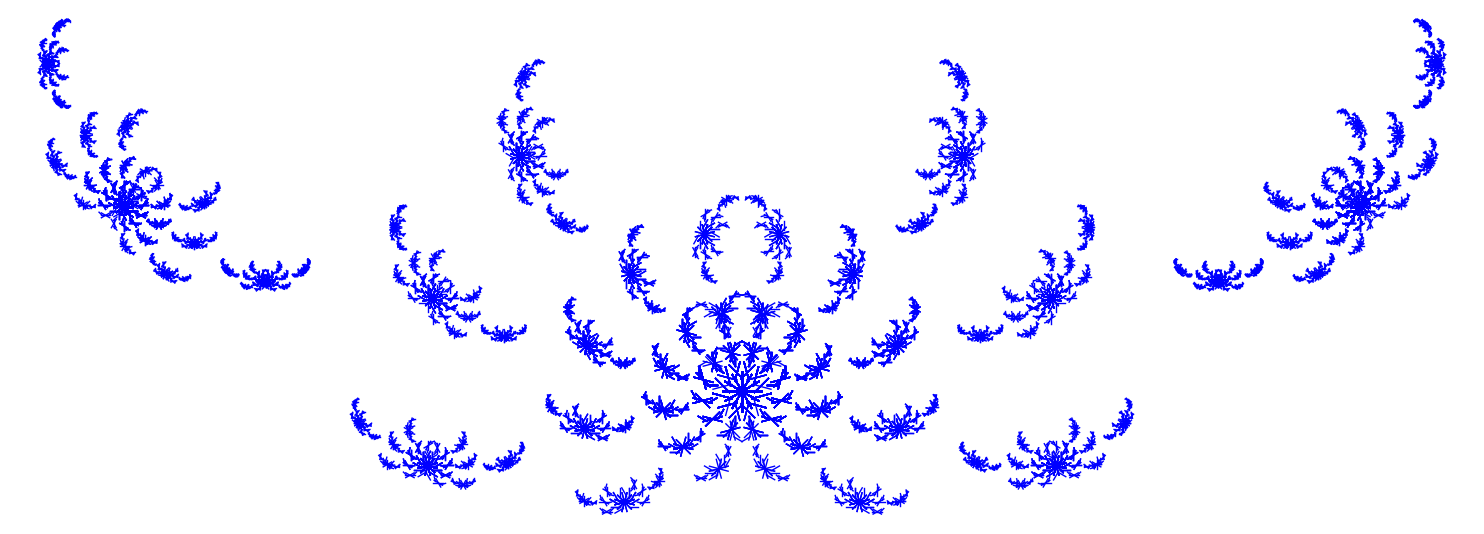

In [10]:
Test2 = column_matrix(RR, [ [-1,0,1],[1,0,1]])

T2_1 = Translate(0.5,0.15)*Rotate(pi/4)*Scale(1/4)
T2_2 = Scale(1/2)
T2_3 = Translate(-.5,0.15)*Rotate(-pi/4)*Scale(1/4)
T2_4 = Rotate(-pi/6)*Scale(1/2)
T2_5 = Rotate(pi/6)*Scale(1/2)

T2 = [T2_1, T2_2, T2_3, T2_4, T2_5]

PlotFigures(Generate(6, [Test2], T2), False, 15, 'blue')

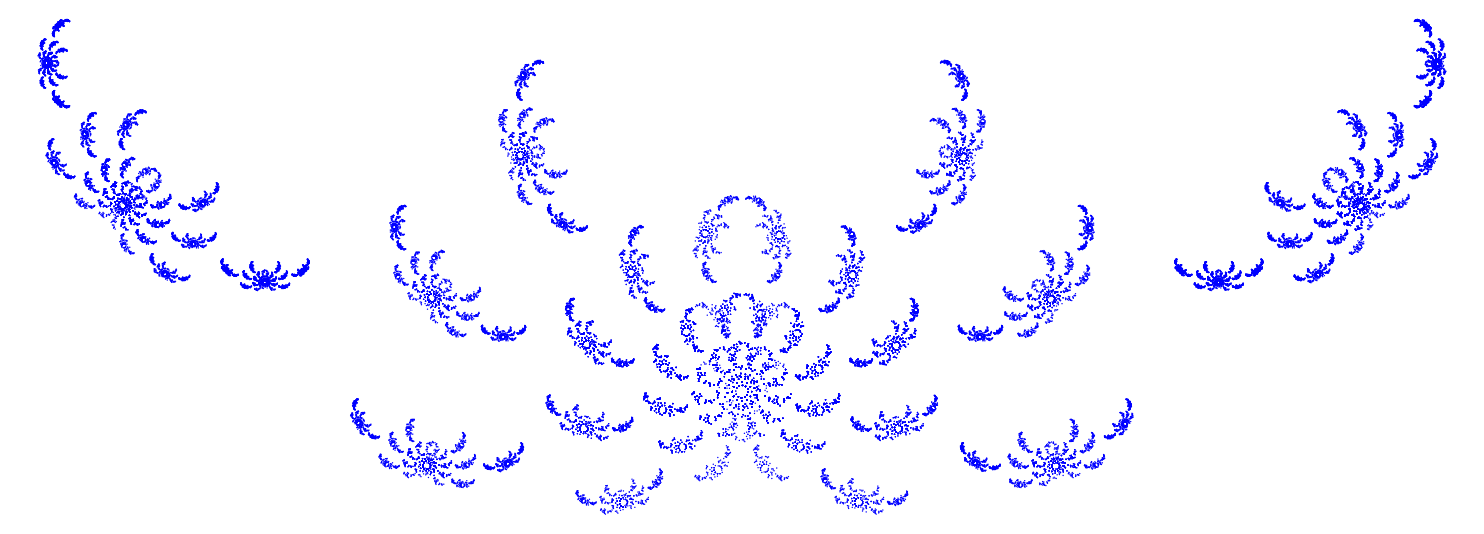

In [12]:
PlotPointFigures(Generate(7, [Test2], T2), False, 1, 15, 'blue')

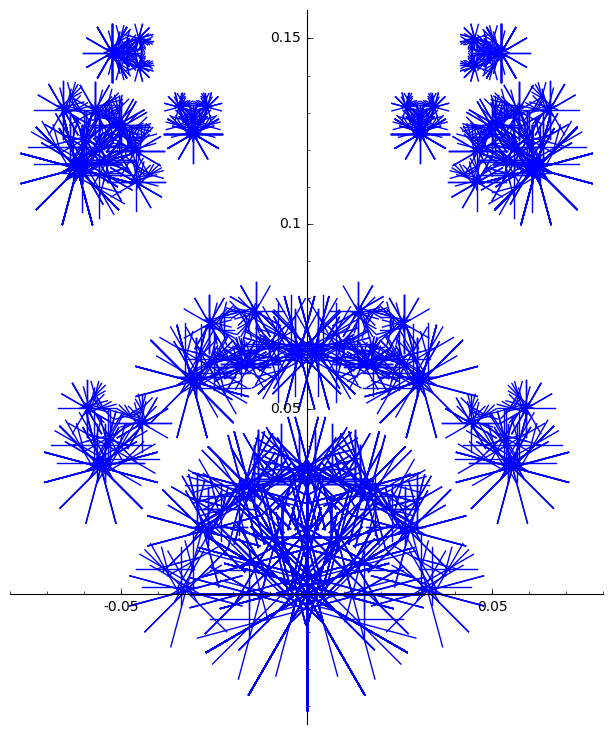

In [8]:
Test3 = column_matrix(RR, [ [-1,0,1],[1,0,1]])

T3_1 = Rotate(pi/4)*Scale(1/4)*Translate(0.5,0.15)
T3_2 = Scale(1/2)
T3_3 = Rotate(-pi/4)*Scale(1/4)*Translate(-.5,0.15)
T3_4 = Rotate(-pi/6)*Scale(1/2)
T3_5 = Rotate(pi/6)*Scale(1/2)

T3 = [T3_1, T3_2, T3_3, T3_4, T3_5]

PlotFigures(Generate(5, [Test3], T3), True, 10, 'blue')

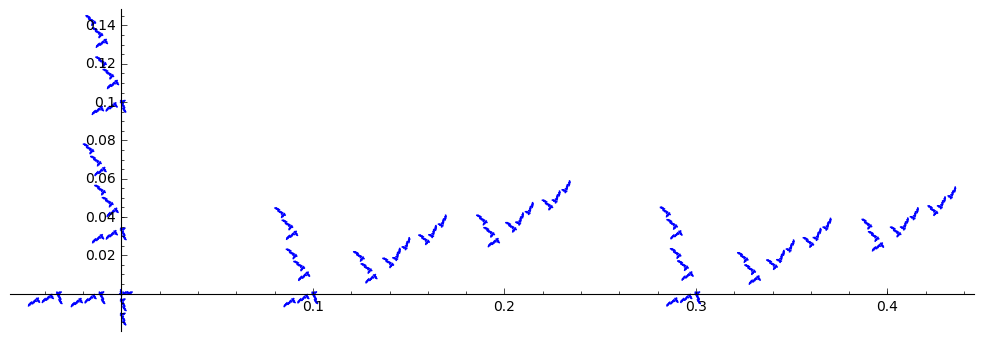

In [215]:
Test4 = column_matrix(RR, [ [0,0,1],[1,0,1]])

T4_1 = Translate(0.3,0)*Rotate(pi/12)*Scale(1/3)
T4_3 = Translate(0.1,0)*Rotate(pi/11)*Scale(1/3)
T4_4 = Rotate(pi/2)*Scale(1/3)

T4 = [T4_1, T4_3, T4_4]

PlotFigures(Generate(7, [Test4], T4), True, 10, 'blue')

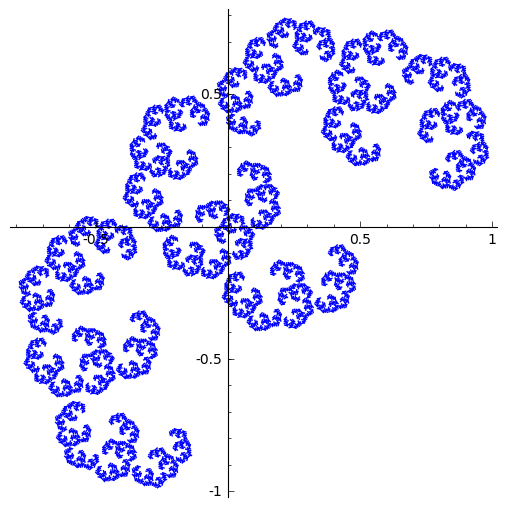

In [217]:
Test5 = column_matrix(RR, [ [0.5,1, 1], [-0.5, 0, 1], [0.5,0, 1], [-0.5, -1, 1]])

T5_1 = Translate(0.5,0.5)*Rotate(-pi/3)*Scale(1/2)
T5_2 = Rotate(pi/2)*Scale(1/2)
T5_3 = Translate(-0.5,-0.5)*Rotate(pi/3)*Scale(1/2)

T5 = [T5_1, T5_2, T5_3]

PlotFigures(Generate(7, [Test5], T5), True, 7, 'blue')

# 

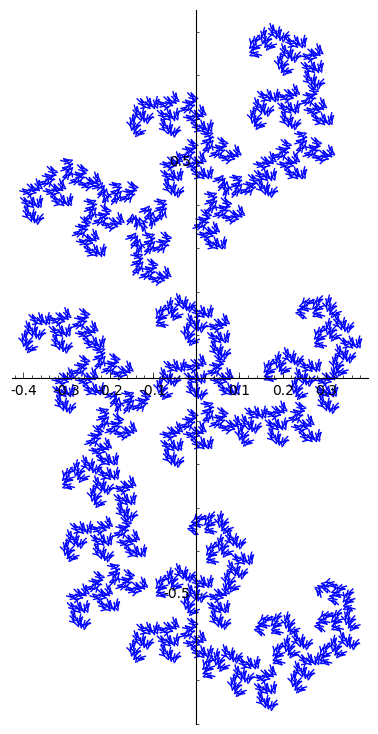

In [220]:
Test6 = column_matrix(RR, [ [0.5,1, 1], [-0.5, 0, 1], [0.5,0, 1], [-0.5, -1, 1]])

T6_1 = Translate(0,0.5)*Rotate(2*pi/3)*Scale(1/2)
T6_2 = Rotate(pi/2)*Scale(1/2)
T6_3 = Translate(0,-0.5)*Rotate(pi/3)*Scale(1/2)

T6 = [T6_1, T6_2, T6_3]

PlotFigures(Generate(7, [Test6], T6), True, 10, 'blue')

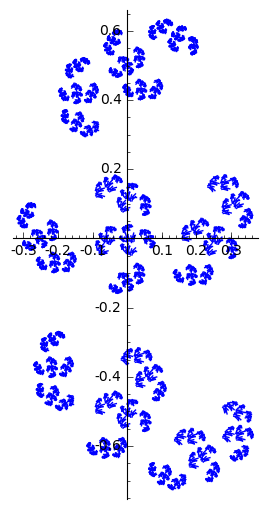

In [222]:
Test7 = column_matrix(RR, [ [0.5,1, 1], [-0.5, 0, 1], [0.5,0, 1], [-0.5, -1, 1]])

T7_1 = Translate(0,0.5)*Rotate(-pi/3)*Scale(1/3)
T7_2 = Rotate(pi/2)*Scale(1/2)
T7_3 = Translate(0,-0.5)*Rotate(pi/3)*Scale(1/2)

T7 = [T7_1, T7_2, T7_3]

PlotFigures(Generate(7, [Test7], T7), True, 7, 'blue')

### 

In [0]:
T8_1 = Translate(0,0.5)*Rotate(-pi/3)*Scale(1/3)
T8_2 = Rotate(pi/2)*Scale(1/2)
T8_3 = Translate(0,-0.5)*Rotate(pi/3)*Scale(1/2)

T8 = [T8_1, T8_2, T8_3]

PlotPointFigures(Generate(10, [Test8], T8), True, 1, 10, 'blue')